# Reciept

In [17]:
from PIL import Image
import pytesseract
import argparse
import cv2
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import csv
import nltk
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import wordnet 


In [18]:
image=cv2.imread(r"C:\Users\saivi\Downloads\bill1.jpg",0)

In [19]:
text=(pytesseract.image_to_string(image)).lower()
print(text)


#10 t.v.k road, (opp. sathyam cinema),
royapettah, chennai-600014
gstin no; 33aawfr9367d1zm

fssai code : 12419002005265
phone : 044-48555563, 48503030
e-mail: rotticious@gmail:com

invoice

inv no # roy00004432
date 92/09/2023 1:11pm

dine in- ts
item name qty price dis sub
three cheese pasta | 170 170
ad. mushroom l 50 50
cheese corn balls 1 160 160
| gendral item 1 250 250
“total 630

| heattikaannicake



In [20]:
import re
from datetime import datetime

# Your extracted text
text = "#10 t.v.k road, (opp. sathyam cinema),\nroyapettah, chennai-600014\ngstin no; 33aawfr9367d1zm\nfssai code : 12419002005265\nphone : 044-48555563, 48503030\ne-mail: rotticious@gmail:com\ninvoice\ninv no # roy00004432\ndate 22/09/2023 1:11pm\ndine in- ts\nitem name qty price dis sub\nthree cheese pasta | 170 170\nad. mushroom l 50 50\ncheese corn balls 1 160 160\n| gendral item 1 250 250\n“total 630\n| heattikaannicake"

# Extract the date using a regular expression
date_match = re.search(r'\bdate (\d{1,2}/\d{1,2}/\d{4})', text)
if date_match:
    extracted_date = date_match.group(1)

    # Convert the extracted date to a datetime object
    date_obj = datetime.strptime(extracted_date, '%d/%m/%Y')

    # Format the date as 'dd/mm/yyyy'
    modified_date = date_obj.strftime('%d/%m/%Y')

    # Replace the original date in the text with the modified date
    text = text.replace(extracted_date, modified_date)

print(text)


#10 t.v.k road, (opp. sathyam cinema),
royapettah, chennai-600014
gstin no; 33aawfr9367d1zm
fssai code : 12419002005265
phone : 044-48555563, 48503030
e-mail: rotticious@gmail:com
invoice
inv no # roy00004432
date 22/09/2023 1:11pm
dine in- ts
item name qty price dis sub
three cheese pasta | 170 170
ad. mushroom l 50 50
cheese corn balls 1 160 160
| gendral item 1 250 250
“total 630
| heattikaannicake


In [21]:
match=re.findall(r'\d+[/.-]\d+[/.-]\d+', text)

st=" "
st=st.join(match)
print(st)


22/09/2023


In [22]:
nltk.download('punkt',quiet=True)
nltk.download('wordnet',quiet=True)

True

In [23]:
#lets try to extract title
sent_tokens=nltk.sent_tokenize(text)
#print(sent_tokens)
sent_tokens[0].splitlines()[0]


'#10 t.v.k road, (opp.'

In [35]:
price=re.findall(r'[₹](\d+(?:\.\d{1,2})?)',text)
price = list(map(float,price)) 
print(max(price))
x=max(price)  


250.0


In [33]:
import re

text = "Sample text with prices: ₹170,₹50,₹160,₹250"

# Find prices in the text
price_matches = re.findall(r'[₹](\d+(?:\.\d{1,2})?)', text)

if price_matches:
    # Convert the matched prices to float
    prices = [float(match) for match in price_matches]

    if prices:
        max_price = max(prices)
        print(f"The maximum price is: {max_price}")
    else:
        print("No valid prices found in the text.")
else:
    print("No prices found in the text.")


The maximum price is: 250.0


In [25]:
#till here we have extracted date,title and amount.
#now its time to categorise bill whether it is shopping or grocery like wise
#so i will first tokenise the text and search for key words
print(word_tokenize(text))

['#', '10', 't.v.k', 'road', ',', '(', 'opp', '.', 'sathyam', 'cinema', ')', ',', 'royapettah', ',', 'chennai-600014', 'gstin', 'no', ';', '33aawfr9367d1zm', 'fssai', 'code', ':', '12419002005265', 'phone', ':', '044-48555563', ',', '48503030', 'e-mail', ':', 'rotticious', '@', 'gmail', ':', 'com', 'invoice', 'inv', 'no', '#', 'roy00004432', 'date', '22/09/2023', '1:11pm', 'dine', 'in-', 'ts', 'item', 'name', 'qty', 'price', 'dis', 'sub', 'three', 'cheese', 'pasta', '|', '170', '170', 'ad', '.', 'mushroom', 'l', '50', '50', 'cheese', 'corn', 'balls', '1', '160', '160', '|', 'gendral', 'item', '1', '250', '250', '“', 'total', '630', '|', 'heattikaannicake']


In [26]:
#we will remove punctuation
tokenizer = nltk.RegexpTokenizer(r"\w+")
new_words = tokenizer.tokenize(text)
print(new_words)

['10', 't', 'v', 'k', 'road', 'opp', 'sathyam', 'cinema', 'royapettah', 'chennai', '600014', 'gstin', 'no', '33aawfr9367d1zm', 'fssai', 'code', '12419002005265', 'phone', '044', '48555563', '48503030', 'e', 'mail', 'rotticious', 'gmail', 'com', 'invoice', 'inv', 'no', 'roy00004432', 'date', '22', '09', '2023', '1', '11pm', 'dine', 'in', 'ts', 'item', 'name', 'qty', 'price', 'dis', 'sub', 'three', 'cheese', 'pasta', '170', '170', 'ad', 'mushroom', 'l', '50', '50', 'cheese', 'corn', 'balls', '1', '160', '160', 'gendral', 'item', '1', '250', '250', 'total', '630', 'heattikaannicake']


In [27]:
#stop_words = set(nltk.corpus.stopwords.words('english')) 
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\saivi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [28]:
#there are stop words like a ,an,the etc which are not required
#so we need to filter them
stop_words = set(nltk.corpus.stopwords.words('english')) 

In [29]:
#there is the filetred list
filtered_list=[w for w in new_words if w not in stop_words ]
print(filtered_list)

['10', 'v', 'k', 'road', 'opp', 'sathyam', 'cinema', 'royapettah', 'chennai', '600014', 'gstin', '33aawfr9367d1zm', 'fssai', 'code', '12419002005265', 'phone', '044', '48555563', '48503030', 'e', 'mail', 'rotticious', 'gmail', 'com', 'invoice', 'inv', 'roy00004432', 'date', '22', '09', '2023', '1', '11pm', 'dine', 'ts', 'item', 'name', 'qty', 'price', 'dis', 'sub', 'three', 'cheese', 'pasta', '170', '170', 'ad', 'mushroom', 'l', '50', '50', 'cheese', 'corn', 'balls', '1', '160', '160', 'gendral', 'item', '1', '250', '250', 'total', '630', 'heattikaannicake']


In [6]:
from nltk.corpus import wordnet

# Initialize the list
entertainment = []

# Find synonyms for "entertainment" using WordNet
for syn in wordnet.synsets("entertainment"):
    for l in syn.lemmas():
        entertainment.append(l.name())

# Additional entertainment-related words
l = ['happy', 'restaurant', 'food', 'kitchen', 'hotel', 'room', 'park', 'movie', 'cinema', 'popcorn', 'combo meal']

# Extend the list with additional words
entertainment.extend(l)

# Print the list of words related to entertainment
print(entertainment)


['entertainment', 'amusement', 'happy', 'restaurant', 'food', 'kitchen', 'hotel', 'room', 'park', 'movie', 'cinema', 'popcorn', 'combo meal']


In [7]:
#entertainment
entertainment = [] 
for syn in wordnet.synsets("entertainment"): 
    for l in syn.lemmas(): 
        entertainment.append(l.name()) 
        
l=['happy','restaurant','food','kitchen','hotel','room','park','movie','cinema','popcorn','combo meal']
entertainment=entertainment+l

In [14]:
#home utility
home_utility=[] 
for syn in wordnet.synsets("home"): 
    for l in syn.lemmas(): 
         home_utility.append(l.name()) 
l2=['internet','telephone','elecricity','meter','wifi','broadband','consumer','reading','gas','water','postpaid','prepaid']
home_utility+=l2

In [15]:
#grocery
 
grocery=[] 
for syn in wordnet.synsets("grocery"): 
    for l in syn.lemmas(): 
         grocery.append(l.name())
l3=['bigbasket','milk','atta','sugar','suflower','oil','bread','vegetabe','fruit','salt','paneer']
grocery+=l3

In [16]:
#investment
investment=[] 
for syn in wordnet.synsets("investment"): 
    for l in syn.lemmas(): 
         investment.append(l.name()) 
l1=['endowment','grant','loan','applicant','income','expenditure','profit','interest','expense','finance','property','money','fixed','deposit','kissan','vikas']
investment=investment+l1

In [17]:
#travel and transportation
transport=[]
for syn in wordnet.synsets("car"): 
    for l in syn.lemmas(): 
         transport.append(l.name()) 
l4=['cab','ola','uber','autorickshaw','railway','air','emirates','aerofloat','taxi','booking','road','highway']
transport+=l4

In [18]:
#shopping
shopping=[]
for syn in wordnet.synsets("dress"): 
    for l in syn.lemmas(): 
         shopping.append(l.name()) 
l4=['iphone','laptop','saree','max','pantaloons','westside','vedic','makeup','lipstick','cosmetics','mac','facewash','heels','crocs','footwear','purse']
shopping+=l4

In [19]:
#here we will check that the bill belongs to which category
#we will make that category true.
for word in filtered_list:
    if word in entertainment:
        e=True
        break
    elif word in investment:
        inv=True
        break
    elif word in grocery:
        g=True
        break
    elif word in shopping:
        s=True
        break
    elif word in transport:
        t=True
        break
    elif word in home_utility:
        h=True
        break

In [20]:
#this is how i created all the csv files.
'''with open('entertainment1.csv', 'a', newline='') as csvfile:
    spamwriter = csv.writer(csvfile, delimiter=',',quoting=csv.QUOTE_MINIMAL)
    spamwriter.writerow(['date','organisation','amount'])'''

"with open('entertainment1.csv', 'a', newline='') as csvfile:\n    spamwriter = csv.writer(csvfile, delimiter=',',quoting=csv.QUOTE_MINIMAL)\n    spamwriter.writerow(['date','organisation','amount'])"

In [37]:
'''with open('investment1.csv', 'a', newline='') as csvfile:
    spamwriter = csv.writer(csvfile, delimiter=',',quoting=csv.QUOTE_MINIMAL)
    spamwriter.writerow(['date','organisation','amount'])'''

"with open('investment1.csv', 'a', newline='') as csvfile:\n    spamwriter = csv.writer(csvfile, delimiter=',',quoting=csv.QUOTE_MINIMAL)\n    spamwriter.writerow(['date','organisation','amount'])"

In [41]:
'''with open('home_utility.csv', 'a', newline='') as csvfile:
    spamwriter = csv.writer(csvfile, delimiter=',',quoting=csv.QUOTE_MINIMAL)
    spamwriter.writerow(['date','organisation','amount'])'''

"with open('home_utility.csv', 'a', newline='') as csvfile:\n    spamwriter = csv.writer(csvfile, delimiter=',',quoting=csv.QUOTE_MINIMAL)\n    spamwriter.writerow(['date','organisation','amount'])"

In [42]:
#question 2
#this code the category in which the bill belongs to
#if e is true then entertainment categrory and we will ,ake filename as entertainment.csv using
#formatting
if(e):
    print("entertainment category")
    filename='{}.csv'.format('entertainment')
    #df=pd.read_csv('entertainment.csv')
elif(inv):
    print("investment category")
    filename='{}.csv'.format('investment')
    #df=pd.read_csv('investment.csv')
elif(s):
    print("shopping category")
    filename='{}.csv'.format('shopping')
    #df=pd.read_csv('shopping.csv')
elif(g):
    print("grocery category")
    filename='{}.csv'.format('grocery')
    #df=pd.read_csv('grocery.csv')
elif(t):
    print("transport category")
    filename='{}.csv'.format('transport')
    #df=pd.read_csv('transport.csv')
elif(h):
    print("home utility category")
    filename='{}.csv'.format('home')
    #df=pd.read_csv('home.csv')
else:
    print("others")
    filename='{}.csv'.format('others')
    #df=pd.read_csv('others.csv')
        

entertainment category


In [44]:
# Define the variables
inv = True  # Example: Set to True if it's an investment category, or False if it's not
s = False   # Example: Set to True for shopping category, or False if it's not
g = False   # Example: Set to True for grocery category, or False if it's not
t = False   # Example: Set to True for transport category, or False if it's not
h = False   # Example: Set to True for home utility category, or False if it's not

# Rest of your code
if inv:
    print("investment category")
    filename = '{}.csv'.format('investment')
    # df = pd.read_csv('investment.csv')
elif s:
    print("shopping category")
    filename = '{}.csv'.format('shopping')
    # df = pd.read_csv('shopping.csv')
elif g:
    print("grocery category")
    filename = '{}.csv'.format('grocery')
    # df = pd.read_csv('grocery.csv')
elif t:
    print("transport category")
    filename = '{}.csv'.format('transport')
    # df = pd.read_csv('transport.csv')
elif h:
    print("home utility category")
    filename = '{}.csv'.format('home')
    # df = pd.read_csv('home.csv')
else:
    print("others")
    filename = '{}.csv'.format('others')
    # df = pd.read_csv('others.csv')


investment category


In [9]:
# Define sample values for st, head, and x
st = "Sample Text"
head = "Header"
x = 42

# Create the row_contents list
row_contents = [st, head, x]

# Rest of your code for appending to a CSV file
from csv import writer

def append_list_as_row(file, list_of_elem):
    with open(file, 'a+', newline='') as write_obj:
        csv_writer = writer(write_obj)
        csv_writer.writerow(list_of_elem)

filename = "your_file.csv"  # Specify the CSV file name
append_list_as_row(filename, row_contents)


In [10]:
#add the contents in thier respective csv file
row_contents = [st,head,x]
from csv import writer
 
def append_list_as_row(file, list_of_elem):
   
    with open(file, 'a+', newline='') as write_obj:
       
        csv_writer = writer(write_obj)
        
        csv_writer.writerow(list_of_elem)
append_list_as_row(filename, row_contents)


In [12]:
import pandas as pd

# Read CSV files
entertainment = pd.read_csv('entertainment.csv')
investment = pd.read_csv('investment.csv')
shopping = pd.read_csv('shopping.csv')
grocery = pd.read_csv('grocery.csv')
transport = pd.read_csv('transport.csv')
other = pd.read_csv('others.csv')
home = pd.read_csv('home.csv')

# You can now use these DataFrames for data analysis or manipulation


In [13]:
#after this make sure you save it
entertainment=pd.read_csv('entertainment.csv')
investment=pd.read_csv('investment.csv')
shopping=pd.read_csv('shopping.csv')
grocery=pd.read_csv('grocery.csv')
transport=pd.read_csv('transport.csv')
other=pd.read_csv('others.csv')
home=pd.read_csv('home.csv')


In [59]:
entertainment.head()

,Date organisation amount
0,2013-07-04 ying thai kitchen 12.59
1,2017-01-07 sri krishna 70.00
2,2018-11-15 paninnaro 200.00
3,2018-08-19 four seasons 3577.00
4,2019-10-11 lakshmi vilas 400.00


In [71]:
investment.head()

,Date Description Amount
0,2015-11-08 shriram transport finance comp...


In [77]:
shopping.head()

,Date organisation amount
0,2019-01-27 gauri garments 2400
1,2018-02-19 thakur 3000
2,2019-06-20 paytm 507
3,2020-01-27 max 500
4,2019-02-19 pantaloons 700


In [80]:
grocery.head()

,Date organisation amount
0,2020-10-02 dmart 1500
1,2020-03-15 hind 500
2,2020-01-14 osia 1500
3,2019-09-15 osia 700
4,2020-01-20 bigbasket 400


In [83]:
transport.head()

,Date organisation amount
0,2019-08-13 ola 200
1,2019-08-15 ola 150
2,2019-08-16 uber 60
3,2018-01-01 dipam motors 1000
4,2020-03-03 honda 5000


In [15]:
other.head()

,Date organisation amount
0,2020-01-13 vision ...
1,2019-02-15 new era ...
2,2019-12-25 yukti ...


In [17]:
entertainment.shape

(5, 1)

In [18]:
entertainment.describe()

,Date organisation amount
count,5
unique,5
top,2013-07-04 ying thai kitchen 12.59
freq,1


In [43]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import pytesseract
import re

from pytesseract import Output


In [45]:
def plot_gray(image):
    plt.figure(figsize=(16,10))
    return plt.imshow(image, cmap='Greys_r')


In [46]:
def plot_rgb(image):
    plt.figure(figsize=(16,10))
    return plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))


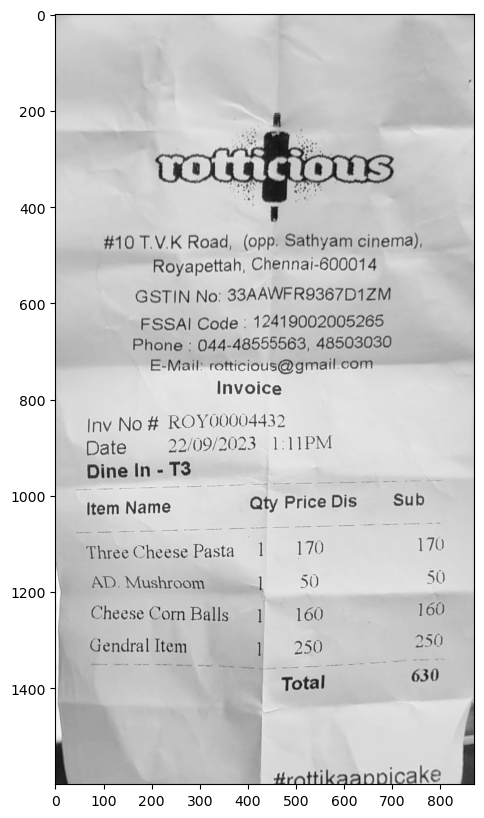

In [47]:
file_name = r"C:\Users\saivi\Downloads\bill1.jpg"
image = cv2.imread(file_name, cv2.IMREAD_GRAYSCALE) 
plot_gray(image)


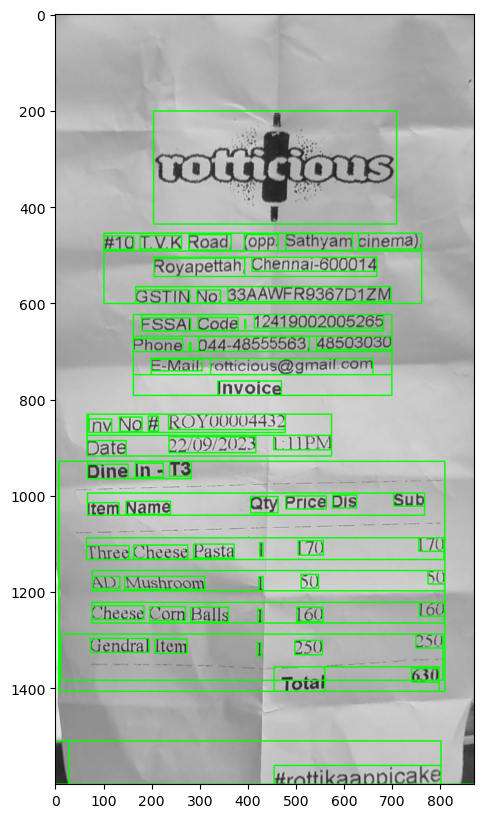

In [48]:
d = pytesseract.image_to_data(image, output_type=Output.DICT)
n_boxes = len(d['level'])
boxes = cv2.cvtColor(image.copy(), cv2.COLOR_BGR2RGB)
for i in range(n_boxes):
    (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])    
    boxes = cv2.rectangle(boxes, (x, y), (x + w, y + h), (0, 255, 0), 2)
    
plot_rgb(boxes)


In [49]:
extracted_text = pytesseract.image_to_string(image)
print(extracted_text)


#10 T.V.K Road, (opp. Sathyam cinema),
Royapettah, Chennai-600014
GSTIN No; 33AAWFR9367D1ZM

FSSAI Code : 12419002005265
Phone : 044-48555563, 48503030
E-Mail: rotticious@gmail:com

Invoice

Inv No # ROY00004432
Date 92/09/2023 1:11PM

Dine In- TS
Item Name Qty Price Dis Sub
Three Cheese Pasta | 170 170
AD. Mushroom l 50 50
Cheese Corn Balls 1 160 160
| Gendral Item 1 250 250
“Total 630

| Heattikaannicake



In [50]:
def find_amounts(text):
    amounts = re.findall(r'\d+\.\d{2}\b', text)
    floats = [float(amount) for amount in amounts]
    unique = list(dict.fromkeys(floats))
    return unique


In [55]:
amounts = find_amounts(extracted_text)
amounts


[170.0, 50.0, 160.0, 250.0]

In [53]:
import re

# Sample extracted text
extracted_text = """
Total Amount: $170.00
Tax: $50.00
Subtotal: $160.00
Discount: $250.00
"""

# Define a regular expression pattern to find amounts
amount_pattern = r'\$\s?(\d+\.\d{2})'

# Find all amounts in the extracted text
amounts = re.findall(amount_pattern, extracted_text)

# Print the extracted amounts
for amount in amounts:
    print(amount)


170.00
50.00
160.00
250.00


In [56]:
max(amounts)

250.0

In [1]:
import pytesseract
from PIL import Image

# Path to your Tesseract executable (update this)
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'

# Path to the receipt image
image_path = r'C:\Users\saivi\Downloads\bill1.jpg'

# Perform OCR on the image
img = Image.open(image_path)
extracted_text = pytesseract.image_to_string(img, lang='eng')

# Print the extracted text
print(extracted_text)


#10 T.V.K Road, (opp. Sathyam cinema),
Royapettah, Chennai-600014

GSTIN No; 33AAWFR9367D1ZM

FSSAI Code : 12419002005265
Phone ; 044-48555563, 48503030
E-Mail rotticious@gmail:com

Invoice

Inv No # ROY00004432
Date 22/09/2023 1:11PM

Dine In- TS

Item Name Qty Price Dis Sub

Three Cheese Pasta | 170 170

AD. Mushroom l 50 50

Cheese Corn Balls 1 160 160

Gendral Item 1 250 250
‘Total 630

Hreattikaannicake

